In [28]:
import numpy as np
import tensorflow as tf
import keras

In [29]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(256, 256, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [30]:
base_model.trainable = False

In [31]:
inputs = keras.Input(shape=(256, 256, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(5)(x)
model = keras.Model(inputs, outputs)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#train_data_dir = r"C:\Users\Trenton\Documents\GitHub\Crops-Capstone-3\crop_images"
#test_data_dir = r"C:\Users\Trenton\Documents\GitHub\Crops-Capstone-3\test_crop_image"

train_data_dir = '/Users/trentonchilds/Documents/github/Crops-Capstone-3/crop_images'
test_data_dir = '/Users/trentonchilds/Documents/github/Crops-Capstone-3/test_crop_image'


img_width, img_height = 256, 256
batch_size = 32

# Create data generator for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into 80% training and 20% validation
)


validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 40 images belonging to 5 classes.
Found 201 images belonging to 5 classes.
Found 45 images belonging to 5 classes.


In [33]:
from keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy, Precision, Recall, F1Score

In [34]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()],
             )
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
7/7 [==============================] - 10s 1s/step - loss: 1.5839 - categorical_accuracy: 0.2637 - val_loss: 1.5278 - val_categorical_accuracy: 0.4250
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 1.4302 - categorical_accuracy: 0.4527 - val_loss: 1.4506 - val_categorical_accuracy: 0.4500
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 1.3039 - categorical_accuracy: 0.5274 - val_loss: 1.3323 - val_categorical_accuracy: 0.4500
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 1.1617 - categorical_accuracy: 0.6169 - val_loss: 1.2165 - val_categorical_accuracy: 0.5250
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 1.1528 - categorical_accuracy: 0.5522 - val_loss: 1.2829 - val_categorical_accuracy: 0.4750
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 1.1070 - categorical_accuracy: 0.5920 - val_loss: 1.1264 - val_categorical_accuracy: 0.6250
Epoch 7/20
7/7 [=================

In [35]:
evaluation_results = model.evaluate(test_generator)

2/2 [==============================] - 2s 511ms/step - loss: 1.2966 - categorical_accuracy: 0.5333


In [36]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])

# Train end-to-end. Be careful to stop before you overfit!
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
7/7 [==============================] - 42s 6s/step - loss: 0.6801 - categorical_accuracy: 0.7861 - val_loss: 0.7720 - val_categorical_accuracy: 0.7250
Epoch 2/10
7/7 [==============================] - 40s 6s/step - loss: 0.5888 - categorical_accuracy: 0.8010 - val_loss: 0.6632 - val_categorical_accuracy: 0.8000
Epoch 3/10
7/7 [==============================] - 40s 6s/step - loss: 0.5093 - categorical_accuracy: 0.8607 - val_loss: 0.5926 - val_categorical_accuracy: 0.7750
Epoch 4/10
7/7 [==============================] - 40s 6s/step - loss: 0.4642 - categorical_accuracy: 0.8308 - val_loss: 0.3774 - val_categorical_accuracy: 0.9750
Epoch 5/10
7/7 [==============================] - 41s 6s/step - loss: 0.3981 - categorical_accuracy: 0.8607 - val_loss: 0.3989 - val_categorical_accuracy: 0.9000
Epoch 6/10
7/7 [==============================] - 43s 6s/step - loss: 0.3272 - categorical_accuracy: 0.8905 - val_loss: 0.4053 - val_categorical_accuracy: 0.9000
Epoch 7/10
7/7 [============

In [37]:
evaluation_results = model.evaluate(test_generator)

2/2 [==============================] - 2s 577ms/step - loss: 1.2952 - categorical_accuracy: 0.6000


2/2 [==============================] - 2s 572ms/step
Predicted: wheat Actual: jute
Image: jute/jute-field.jpg


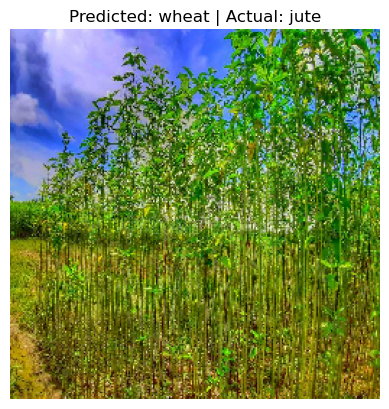

Predicted: maize Actual: jute
Image: jute/jute002.jpg


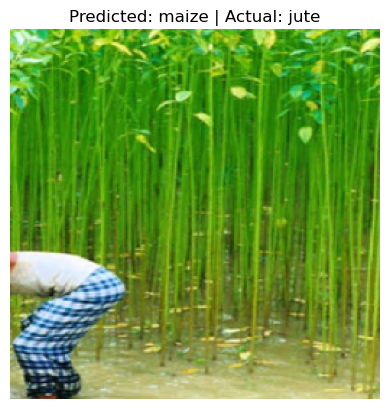

Predicted: rice Actual: jute
Image: jute/jute003.jpg


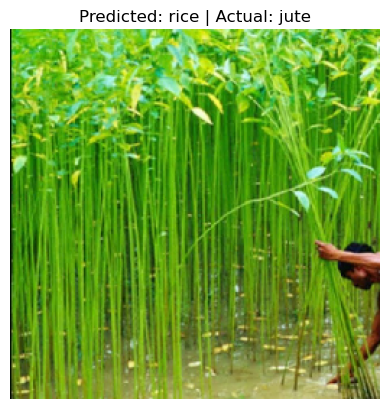

Predicted: rice Actual: jute
Image: jute/jute03.jpg


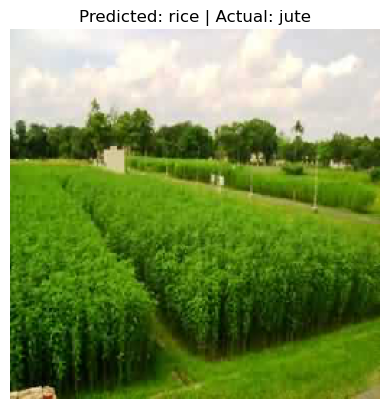

Predicted: maize Actual: jute
Image: jute/jutefield.jpg


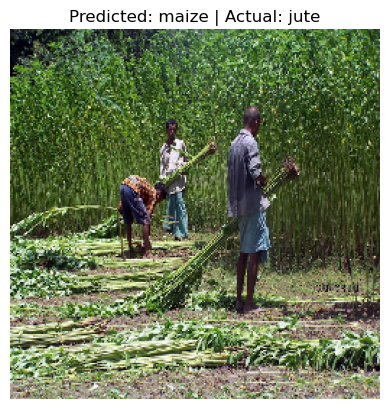

Predicted: rice Actual: jute
Image: jute/juteleaves.jpg


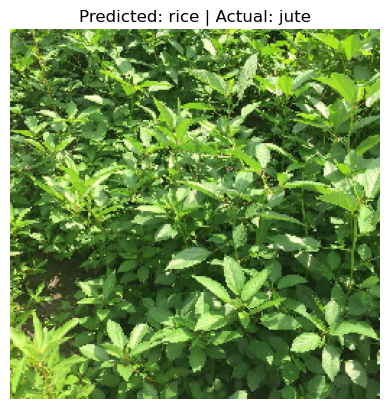

Predicted: maize Actual: jute
Image: jute/juteplants.jpg


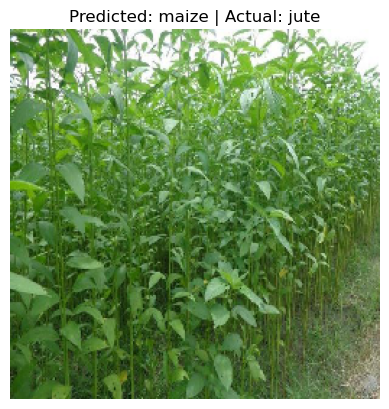

Predicted: rice Actual: maize
Image: maize/maize plant set.jpg


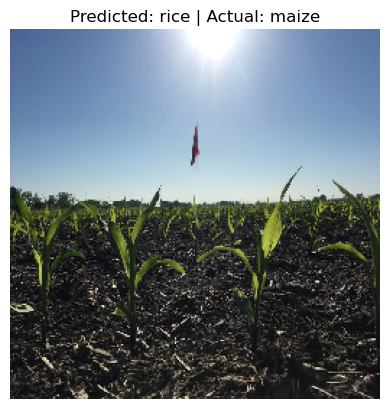

Predicted: rice Actual: maize
Image: maize/maize-Field-Corn.jpg


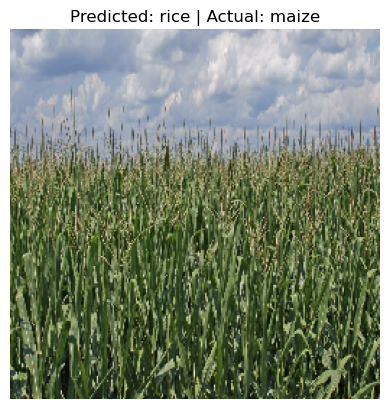

Predicted: rice Actual: maize
Image: maize/maize-field.jpg


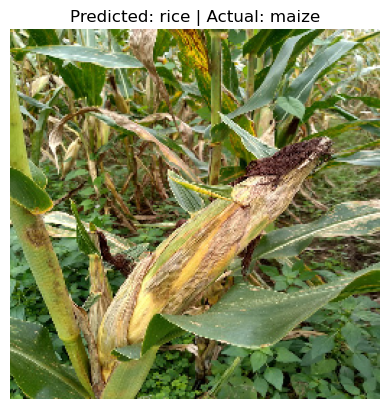

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Predict on test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)  # Convert softmax outputs to class labels
true_labels = test_generator.classes  # True class labels from the generator
filenames = test_generator.filenames  # File names of the images

# Find indices of misclassified examples
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# Display some misclassified examples
num_examples_to_display = 10
for index in misclassified_indices[:num_examples_to_display]:
    print("Predicted:", class_labels[predicted_labels[index]], "Actual:", class_labels[true_labels[index]])
    print("Image:", filenames[index])

    # Load and display the image
    img_path = test_data_dir + '/' + filenames[index]
    img = image.load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title("Predicted: " + class_labels[predicted_labels[index]] + " | Actual: " + class_labels[true_labels[index]])
    plt.axis('off')
    plt.show()
